# Hello world

This is the second challenge I participate in and my first Kernel I ever uploaded to our fine community. My hopes are that you will like and maybe use some parts of it or even gain some wisdom from it. Please leave me any kind of comment, suggestion, love or hate in the comments. I am happy for every single person that thinks reading this kernel is worthy of their precious time. So let us begin...

## Import all the tools...!
Import all the librarys that are useful for loading, prepping and visualizing the data.

In [1]:
import numpy as np # for doing math
import pandas as pd # for handling data
import matplotlib.pyplot as plt # for visualizing 
import seaborn as sns # for visualizing as well!
from os import listdir # handle local data
from os.path import isfile, join 
color = sns.color_palette() # set some color

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999 # restrict max columns

## Import all the data...!
Set the path to the local competition files and load them!

In [2]:
# create path to input
mypath = "../DataSets/NYCTaxi"

# create paths
trainPath = mypath + "/train.csv"

### Inspect the train data

In [3]:
train_df = pd.read_csv(trainPath)
train_df.shape

(1458644, 11)

Looks like we got 1.4 million examples but just 11 features! Lets take a fast peak at the header...

In [4]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Lets look at our target variable (trip_duration)

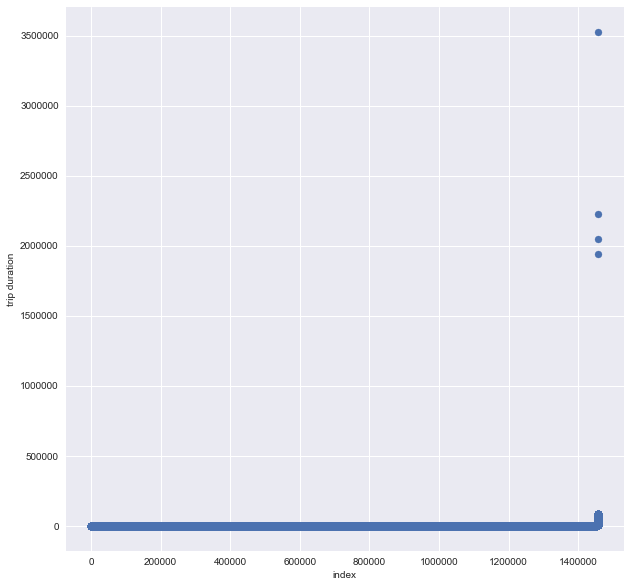

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.trip_duration.values))
plt.xlabel('index', fontsize=10)
plt.ylabel('trip duration', fontsize=10)
plt.show()

#### Holy shit! We got some guests travelling for quite some time ... ?!

In [6]:
longest_trip = train_df.trip_duration.max()
longest_trip_in_hours = longest_trip / 3600
longest_trip_in_days = longest_trip_in_hours / 24
print(longest_trip_in_days)

40.8134490741


#### Ok. so there was someone tripping time in a nyc cap for like 40 days. Lets further investigate that right away!

In [7]:
train_df.sort_values(by='trip_duration', ascending=False).iloc[0]

id                              id0053347
vendor_id                               1
pickup_datetime       2016-02-13 22:46:52
dropoff_datetime      2016-03-25 18:18:14
passenger_count                         1
pickup_longitude                 -73.7839
pickup_latitude                   40.6486
dropoff_longitude                -73.9783
dropoff_latitude                  40.7502
store_and_fwd_flag                      N
trip_duration                     3526282
Name: 978383, dtype: object

#### so this passenger got picked up in the evening of the 13th of februrary and ended his trip in the afternoon of the 25th of march. pickup and end of trip are nearly at the same spot. so we can assume it was not a one way trip :-) we will get to such special cases later on!

#### lets use a log format while checking out our target variable to get a nicer plot

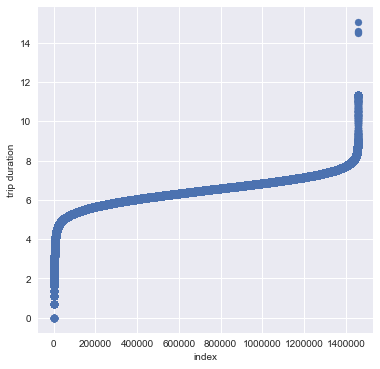

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(range(train_df.shape[0]), np.sort(np.log(train_df.trip_duration.values)))
plt.xlabel('index', fontsize=10)
plt.ylabel('trip duration', fontsize=10)
plt.show()

### Do we have NaNs? 